<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-31/GY1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install impedance -q

In [17]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px

In [2]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1598, done.
remote: Counting objects: 100% (187/187), done.
remote: Compressing objects: 100% (169/169), done.
remote: Total 1598 (delta 123), reused 17 (delta 17), pack-reused 1411 (from 1)
Receiving objects: 100% (1598/1598), 110.55 MiB | 7.37 MiB/s, done.
Resolving deltas: 100% (945/945), done.
Updating files: 100% (196/196), done.


'/content'

In [3]:
%cd "/content/gator/data/07-31/"

/content/gator/data/07-31


In [4]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

# First constant current measurement, fresh after gating

In [5]:
prep_csv('defbuffer1_0731_152436.csv')
df = pd.read_csv('defbuffer1_0731_152436.csv')


Fill Mode,1



In [6]:
df

Reading     Unit  Range Digits  Disp Digits Math Start Group  \
0      0.002138  Volt DC          0.01          5.5    F           F   
1     -0.006232  Volt DC          0.01          5.5    F           F   
2     -0.013554  Volt DC          0.01          5.5    F           F   
3     -0.657557  Volt DC          1.00          5.5    F           F   
4     -0.815253  Volt DC          1.00          5.5    F           F   
...         ...      ...           ...          ...  ...         ...   
55675  0.347618  Volt DC          1.00          5.5    F           F   
55676  0.347559  Volt DC          1.00          5.5    F           F   
55677  0.347481  Volt DC          1.00          5.5    F           F   
55678  0.347678  Volt DC          1.00          5.5    F           F   
55679  0.347508  Volt DC          1.00          5.5    F           F   

      Limit1 High Limit1 Low Limit2 High Limit2 Low  ... Questionable Origin  \
0               F          F           F          F  ...            F   Main   
1               F          F           F          F  ...            F   Main   
2               F          F           F          F  ...            F   Main   
3               F          F           F          F  ...            F   Main   
4               F          F           F          F  ...            F   Main   
...           ...        ...         ...        ...  ...          ...    ...   
55675           F          F           F          F  ...            F   Main   
55676           F          F           F          F  ...            F   Main   
55677           F          F           F          F  ...            F   Main   
55678           F          F           F          F  ...            F   Main   
55679           F          F           F          F  ...            F   Main   

              Value  Unit.1        Digits  Output Sense Source Limit Overtemp  \
0      5.467200e-08  Amp DC  1.000000e-02       T    2W            F        F   
1      5.536760e-08  Amp DC  1.000000e-02       T    2W            F        F   
2      5.606310e-08  Amp DC  1.000000e-02       T    2W            F        F   
3      4.284870e-08  Amp DC  1.000000e-02       T    2W            F        F   
4      4.632620e-08  Amp DC  1.000000e-02       T    2W            F        F   
...             ...     ...           ...     ...   ...          ...      ...   
55675  1.000000e-09  Amp DC  1.000000e-08       T    2W            F        F   
55676  1.000000e-09  Amp DC  1.000000e-08       T    2W            F        F   
55677  1.000000e-09  Amp DC  1.000000e-08       T    2W            F        F   
55678  1.000000e-09  Amp DC  1.000000e-08       T    2W            F        F   
55679  1.000000e-09  Amp DC  1.000000e-08       T    2W            F        F   

      Relative Time  
0          0.000000  
1          0.069382  
2          0.138717  
3          0.507132  
4          0.576502  
...             ...  
55675   3920.908644  
55676   3920.977994  
55677   3921.047350  
55678   3921.116688  
55679   3921.186018  

[55680 rows x 21 columns]

In [7]:
fig = px.scatter(df, x="Relative Time", y=["Reading"])
fig.show()


In [8]:
fig = px.scatter(df, x="Relative Time", y=["Value"])
fig.show()


In [9]:
T = df['Relative Time'].values
I = df['Value'].values
V = df['Reading'].values

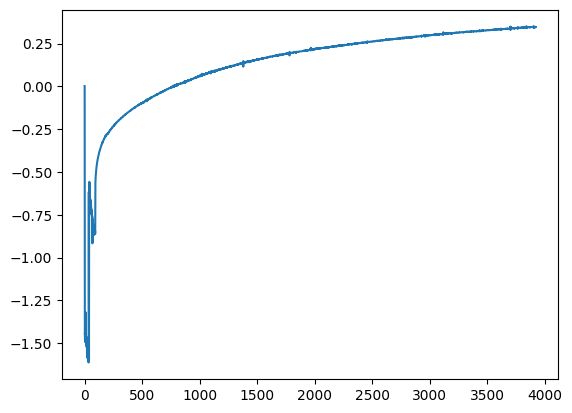

In [10]:
plt.plot(T,V)
#plt.xlim(5800,5980)
#plt.ylim(0.75e-6,1e-6)

# $R_{\text{ion}}C^\delta$

$$D^{\delta}=\frac{4L^2}{\pi  ^{2}(R_{\text{ion}}+R_{\text{eon}})C^{\delta} }<\frac{4L^2}{\pi  ^{2}(R_{\text{ion}})C^{\delta} }\sim 1\cdot 10^{-10} \mathrm{\frac{m^{2}}{s}}$$

(1000.0, 4000.0)

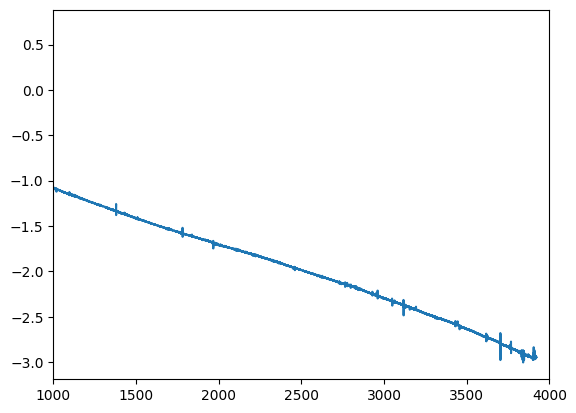

In [11]:
V2=V-0.4
plt.plot(T, np.log(-V2))
plt.xlim(1000,4000)
#plt.ylim(-4)

In [12]:
2/3000

0.0006666666666666666

# EIS, fresh

Unfortunately sample was shorted out during measurement, with resistance measuring around 100Ω...

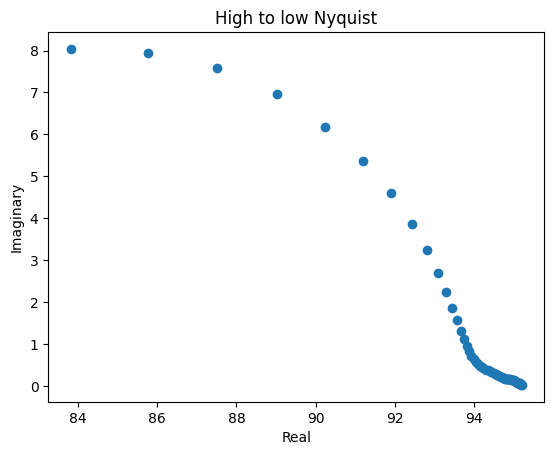

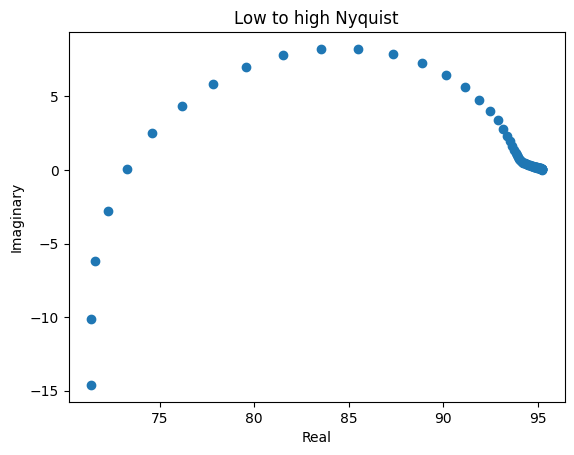

In [21]:
freqs, Z = preprocessing.readZPlot('0731hl_c.z')

plt.plot(Z.real, -Z.imag, 'o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('High to low Nyquist')
plt.show()

freqs, Z = preprocessing.readZPlot('0731lh_c.z')

plt.plot(Z.real, -Z.imag, 'o')
plt.ylabel('Imaginary')
plt.xlabel('Real')
plt.title('Low to high Nyquist')
plt.show()



# Second constant current measurement
After being left for a week in glovebox, resistance has increased 100x.
- -0.1nA
- overnight

In [13]:
prep_csv('/content/gator/data/07-31/defbuffer1_0806_084616.csv')
df = pd.read_csv('/content/gator/data/07-31/defbuffer1_0806_084616.csv')

Fill Mode,1



In [14]:
df

Reading     Unit  Range Digits  Disp Digits Math Start Group  \
0      0.205093  Volt DC           0.1          5.5    F           F   
1      0.188772  Volt DC           0.1          5.5    F           F   
2      0.199591  Volt DC           0.1          5.5    F           F   
3      0.198411  Volt DC           0.1          5.5    F           F   
4      0.187100  Volt DC           0.1          5.5    F           F   
...         ...      ...           ...          ...  ...         ...   
60811 -1.262967  Volt DC           1.0          5.5    F           F   
60812 -1.202218  Volt DC           1.0          5.5    F           F   
60813 -1.218716  Volt DC           1.0          5.5    F           F   
60814 -1.224001  Volt DC           1.0          5.5    F           F   
60815 -1.280922  Volt DC           1.0          5.5    F           F   

      Limit1 High Limit1 Low Limit2 High Limit2 Low  ... Questionable Origin  \
0               F          F           F          F  ...            F   Main   
1               F          F           F          F  ...            F   Main   
2               F          F           F          F  ...            F   Main   
3               F          F           F          F  ...            F   Main   
4               F          F           F          F  ...            F   Main   
...           ...        ...         ...        ...  ...          ...    ...   
60811           F          F           F          F  ...            F   Main   
60812           F          F           F          F  ...            F   Main   
60813           F          F           F          F  ...            F   Main   
60814           F          F           F          F  ...            F   Main   
60815           F          F           F          F  ...            F   Main   

              Value  Unit.1        Digits  Output Sense Source Limit Overtemp  \
0     -3.700000e-10  Amp DC  1.000000e-08       T    2W            F        F   
1     -1.002000e-10  Amp DC  1.000000e-08       T    2W            F        F   
2     -1.085000e-10  Amp DC  1.000000e-08       T    2W            F        F   
3     -1.035000e-10  Amp DC  1.000000e-08       T    2W            F        F   
4     -1.002000e-10  Amp DC  1.000000e-08       T    2W            F        F   
...             ...     ...           ...     ...   ...          ...      ...   
60811 -9.950000e-11  Amp DC  1.000000e-08       T    2W            F        F   
60812 -9.950000e-11  Amp DC  1.000000e-08       T    2W            F        F   
60813 -9.970000e-11  Amp DC  1.000000e-08       T    2W            F        F   
60814 -9.950000e-11  Amp DC  1.000000e-08       T    2W            F        F   
60815 -9.940000e-11  Amp DC  1.000000e-08       T    2W            F        F   

      Relative Time  
0          0.000000  
1          1.069395  
2          2.138776  
3          3.208133  
4          4.277516  
...             ...  
60811  65030.332602  
60812  65031.401979  
60813  65032.471349  
60814  65033.540706  
60815  65034.610079  

[60816 rows x 21 columns]

In [15]:
px.scatter(df, x="Relative Time", y=["Reading"])